In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

sns.set_theme(style="darkgrid")

In [376]:
exp_dir = 103
save_dir = f'../experiments/exp_critic{exp_dir}/'
with open(save_dir + 'hypers.pkl', 'rb') as f:
    params = pickle.load(f)
with open(save_dir + 'seeds.npy', 'rb') as f:
    seeds = np.load(f)
with open(save_dir + 'losses.npy', 'rb') as f:
    losses = np.load(f)
with open(save_dir + 'rewards.npy', 'rb') as f:
    rewards = np.load(f)

In [377]:
params

{'dim_obs': 3,
 'dim_act': 1,
 'dim_hid': 8,
 'n_hid_layers': 1,
 'n_hidden_layers_critic': 2,
 'dim_hidden_critic': 16,
 'std': 0.01,
 'scale_factor': 10,
 'gamma': 0.95,
 'lr': 0.001,
 'lr_critic': 0.001,
 'N_iter': 40,
 'N_episod': 300,
 'n_exp': 15,
 'N_td': 3,
 'N_critic_epoch': 40,
 'dynamic': 'zero'}

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# for i, loss in enumerate(losses):
#     sns.lineplot(loss, marker='.', ax=axes[0])
# for i, reward in enumerate(rewards):
#     sns.lineplot(reward, marker='.', ax=axes[1])
# plt.show()

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# num = 14
# sns.lineplot(losses[num], marker='.', ax=axes[0])
# axes[0].set_xlabel('iterations')
# axes[0].set_ylabel('loss')
# sns.lineplot(rewards[num], marker='.', ax=axes[1])
# axes[1].set_xlabel('iterations')
# axes[1].set_ylabel('reward')
# plt.show()

In [89]:
# max_len = 50
# loss_df_reinforce1 = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
# loss_df_reinforce1['size'] = f'small (113 neurons)'
# reward_df_reinforce1 = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})
# reward_df_reinforce1['size'] = f'small (113 neurons)'

# max_len = 50
# loss_df_reinforce2 = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
# loss_df_reinforce2['size'] = f'medium (625 neurons)'
# reward_df_reinforce2 = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})
# reward_df_reinforce2['size'] = f'medium (625 neurons)'

# max_len = 50
# loss_df_reinforce3 = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
# loss_df_reinforce3['size'] = f'big (3329 neurons)'
# reward_df_reinforce3 = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})
# reward_df_reinforce3['size'] = f'big (3329 neurons)'

In [381]:
# max_len = 50
# loss_df_reinforce = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
# loss_df_reinforce['RL'] = 'REINFORCE'
# reward_df_reinforce = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})
# reward_df_reinforce['RL'] = 'REINFORCE'

# max_len = 50
# loss_df_reinforce_base = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
# loss_df_reinforce_base['RL'] = 'REINFORCE with baseline'
# reward_df_reinforce_base = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})
# reward_df_reinforce_base['RL'] = 'REINFORCE with baseline'

max_len = 50
loss_df_a2c = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
loss_df_a2c['RL'] = 'Actor Critic'
reward_df_a2c = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})
reward_df_a2c['RL'] = 'Actor Critic'

# max_len = 50
# loss_df_ppo = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
# loss_df_ppo['RL'] = 'PPO'
# reward_df_ppo = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iterations': np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})
# reward_df_ppo['RL'] = 'PPO'

In [382]:
# loss_df = pd.concat([loss_df_reinforce1, loss_df_reinforce2, loss_df_reinforce3], ignore_index=True, axis=0)
# reward_df = pd.concat([reward_df_reinforce1, reward_df_reinforce2, reward_df_reinforce3], ignore_index=True, axis=0)

loss_df = pd.concat([loss_df_reinforce, loss_df_reinforce_base, loss_df_a2c, loss_df_ppo], ignore_index=True, axis=0)
reward_df = pd.concat([reward_df_reinforce, reward_df_reinforce_base, reward_df_a2c, reward_df_ppo], ignore_index=True, axis=0)

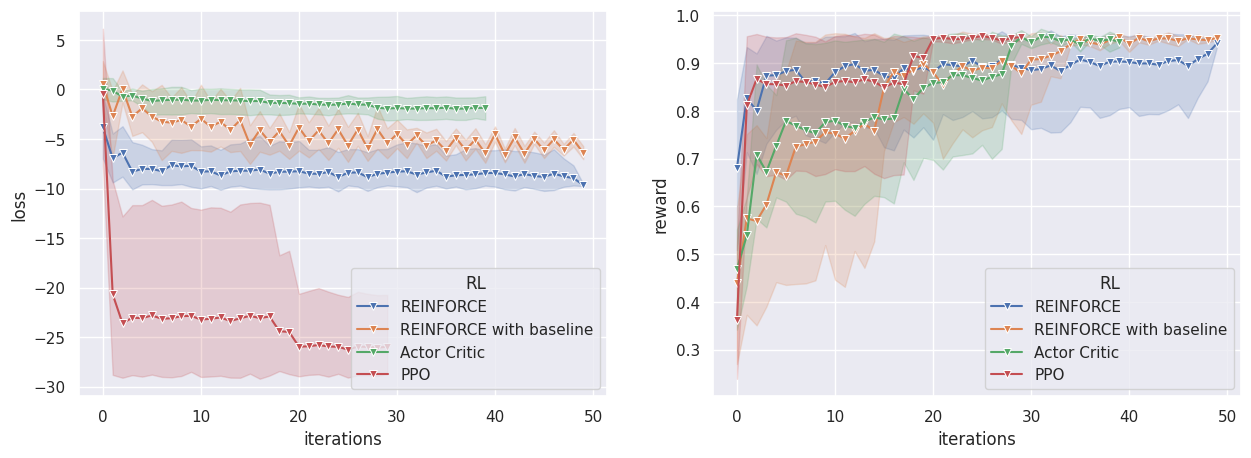

In [383]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(loss_df, marker='v', ax=axes[0], x='iterations', y='loss', hue='RL')
axes[0].set_xlabel('iterations')
axes[0].set_ylabel('loss')
sns.lineplot(reward_df, marker='v', ax=axes[1], x='iterations', y='reward', hue='RL')
axes[1].set_xlabel('iterations')
axes[1].set_ylabel('reward')
plt.show()

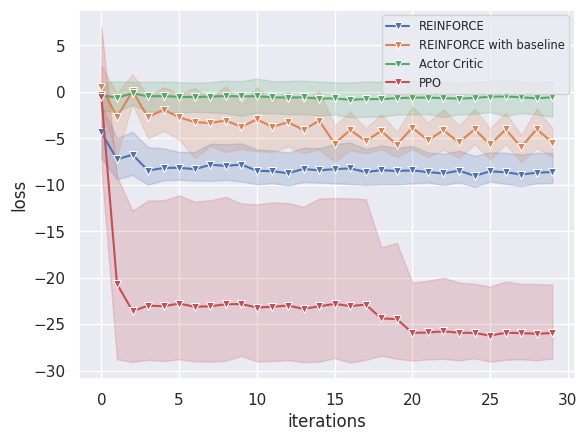

In [371]:
save_loss_name = f'../title_plots/loss_all_zero.svg'
sns.lineplot(loss_df[loss_df['iterations'] < 30], marker='v', x='iterations', y='loss', hue='RL')
plt.legend(fontsize='x-small', title_fontsize='40')
#plt.show()
plt.savefig(save_loss_name, format='svg')

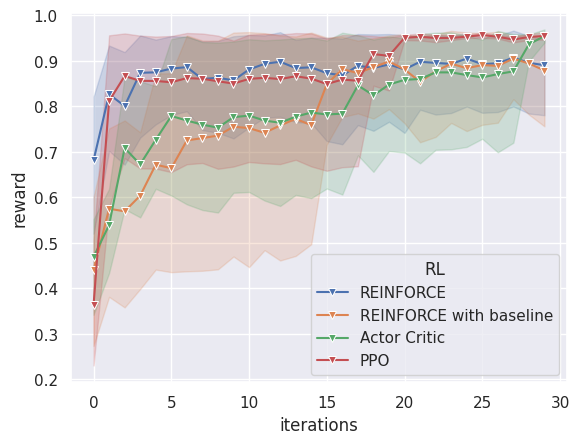

In [384]:
save_reward_name = f'../title_plots/reward_all_zero.svg'
sns.lineplot(reward_df[reward_df['iterations'] < 30], marker='v', x='iterations', y='reward', hue='RL')
#plt.show()
plt.savefig(save_reward_name, format='svg')